In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Chapter 6 - Other Popular Machine Learning Models Models
## Segment 3 - Instance-based learning w/ k-Nearest Neighbor
#### Setting up for classification analysis

In [8]:
import numpy as np
import pandas as pd
import scipy
import urllib
import sklearn

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
np.set_printoptions(precision=4, suppress=True) 
%matplotlib inline
rcParams['figure.figsize'] = 7, 4
plt.style.use('seaborn-whitegrid')

## Importing your data

In [5]:
#address = 'C:/Users/Lillian/Desktop/ExerciseFiles/Data/mtcars.csv'

cars = pd.read_csv('mtcars.csv')
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

In [6]:
cars.shape
cars.columns
cars.head()

(32, 12)

Index(['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [7]:
cars.info()
cars.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   car_names  32 non-null     object 
 1   mpg        32 non-null     float64
 2   cyl        32 non-null     int64  
 3   disp       32 non-null     float64
 4   hp         32 non-null     int64  
 5   drat       32 non-null     float64
 6   wt         32 non-null     float64
 7   qsec       32 non-null     float64
 8   vs         32 non-null     int64  
 9   am         32 non-null     int64  
 10  gear       32 non-null     int64  
 11  carb       32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [17]:
cars['am'].value_counts()

0    19
1    13
Name: am, dtype: int64

<AxesSubplot:xlabel='am', ylabel='count'>

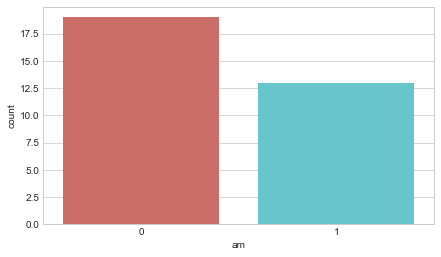

In [18]:
sns.countplot(x='am', data=cars, palette='hls')

## Defining features and target
target is `am`

In [11]:
X_prime = cars[['mpg', 'disp', 'hp', 'wt']].values
y = cars.iloc[:,9].values

In [12]:
type(X_prime), X_prime.shape
type(y), y.shape

(numpy.ndarray, (32, 4))

(numpy.ndarray, (32,))

In [13]:
X = preprocessing.scale(X_prime)

In [20]:
preprocessing.scale?

In [14]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.2, random_state=17)

## Building and training your model with training data

In [21]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
clf.get_params()

KNeighborsClassifier()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## Evaluating your model's predictions

In [16]:
y_pred= clf.predict(X_test)
y_expect = y_test

print(metrics.classification_report(y_expect, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.67      0.80         3

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7

